In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import OneHotEncoder, LabelEncoder

# Import the data
df = pd.read_csv("C:/JPEM_Git_Main/JPEM/JPEM_SAIT/Winter2025_PROJ406/Team 6/data/Copy of merged_dataset.csv")

Aggregate Data by Genre and Year:
Calculate the average rating for each genre by year to observe trends.

In [2]:
df['year'] = pd.to_numeric(df['year'], errors='coerce')  # Ensure 'year' is numeric
genre_trends = df.groupby(['genres', 'year'])['rating'].mean().reset_index()
print(genre_trends.head())

   genres  year  rating
0  Action  1962     7.8
1  Action  1967     7.7
2  Action  1968     7.7
3  Action  1977     8.6
4  Action  1979     5.8


Plot Rating Trends Over Time:
Visualize the trends for individual genres to identify patterns.

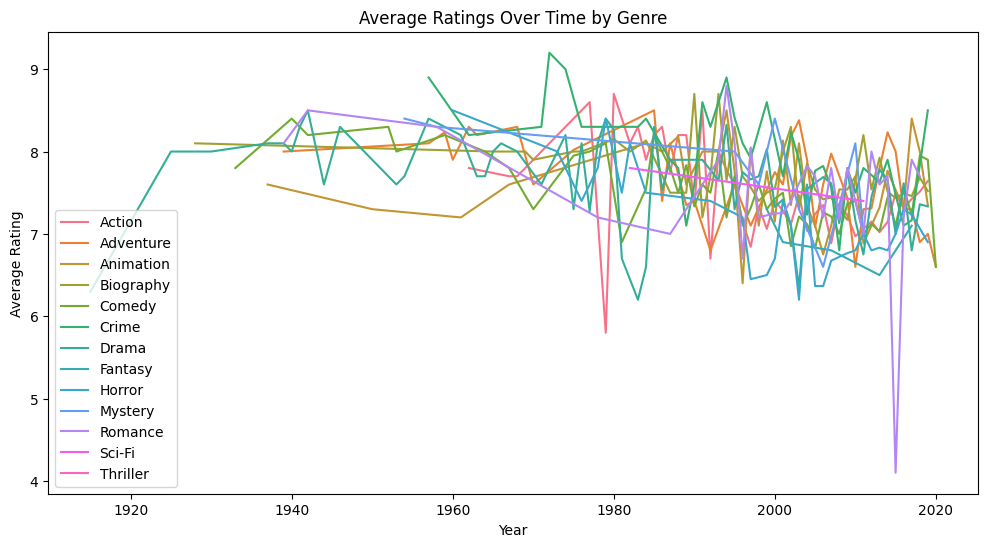

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 6))
sns.lineplot(data=genre_trends, x='year', y='rating', hue='genres')
plt.title('Average Ratings Over Time by Genre')
plt.xlabel('Year')
plt.ylabel('Average Rating')
plt.legend(loc='best')
plt.show()

                               SARIMAX Results                                
Dep. Variable:                 rating   No. Observations:                   49
Model:                 ARIMA(1, 1, 1)   Log Likelihood                 -18.928
Date:                Mon, 31 Mar 2025   AIC                             43.855
Time:                        14:19:19   BIC                             49.469
Sample:                             0   HQIC                            45.977
                                 - 49                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.1303      0.256     -0.508      0.611      -0.633       0.372
ma.L1         -0.7342      0.129     -5.673      0.000      -0.988      -0.481
sigma2         0.1262      0.023      5.483      0.0

c:\Users\jason\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
c:\Users\jason\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
c:\Users\jason\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
c:\Users\jason\AppData\Local\Programs\Python\Python313\Lib

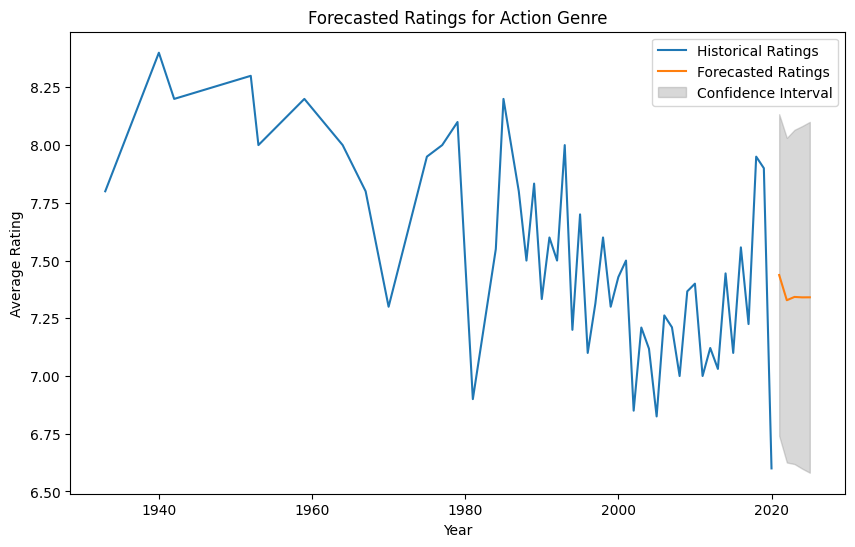

In [6]:
from statsmodels.tsa.arima.model import ARIMA

# Filter data for a specific genre (e.g., 'Action')
action_genre = genre_trends[genre_trends['genres'] == 'Comedy']
action_genre.set_index('year', inplace=True)

# Fit the ARIMA model (adjust parameters as needed)
model = ARIMA(action_genre['rating'], order=(1, 1, 1))  # (p, d, q)
model_fit = model.fit()

# Print the model summary
print(model_fit.summary())

# Forecast future years
forecast = model_fit.get_forecast(steps=5)  # Predict next 5 years
forecast_values = forecast.predicted_mean
conf_int = forecast.conf_int()

# Display forecasted ratings with confidence intervals
print("Forecasted Ratings:\n", forecast_values)
print("Confidence Intervals:\n", conf_int)

# Visualize the forecast
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(action_genre['rating'], label='Historical Ratings')
plt.plot(range(action_genre.index[-1] + 1, action_genre.index[-1] + 6), forecast_values, label='Forecasted Ratings')
plt.fill_between(
    range(action_genre.index[-1] + 1, action_genre.index[-1] + 6),
    conf_int.iloc[:, 0],
    conf_int.iloc[:, 1],
    color='gray',
    alpha=0.3,
    label='Confidence Interval'
)
plt.title('Forecasted Ratings for Action Genre')
plt.xlabel('Year')
plt.ylabel('Average Rating')
plt.legend()
plt.show()